In [ ]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5

     |████████████████████████████████| 358kB 10.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491633 sha256=4592b90b9b39c2b637bac877ef8b1373ab0e36dd84fc32721c46e77d1c9efb9e
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 276kB 11.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=1b56e1592f1c1be7af73bf212a22b2129529c85ba2bb8051905af6f85a5342dc
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 112kB 10.8MB/s 


In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
data.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
df = pd.DataFrame(data, columns=['PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'cooler'])

In [ ]:
df = df.fillna(method='ffill')
df.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,cooler
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,3
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,3
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150,3
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,3
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,3


In [ ]:
df['cooler'].unique()

array([  3,  20, 100])

In [ ]:
df.describe()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,cooler
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,1.753227,2.600266,9.163320,6.198549,9.649453,45.424567,2495.509203,0.613315,31.300695,1.808399,55.287900,41.240816
std,4.699425,0.251902,4.279355,0.576296,1.032883,0.449246,7.991933,73.836682,0.060260,11.574310,0.278263,8.960189,42.383143
min,155.391547,0.840252,0.000000,8.365800,2.018572,8.857513,35.313783,2361.747267,0.524367,17.555983,1.062150,18.276617,3.000000
25%,158.100195,1.729733,0.000000,8.547239,6.391670,9.203397,36.237150,2442.933467,0.555100,20.084650,1.550100,56.270183,3.000000
50%,158.960895,1.779631,0.000000,9.115781,6.576673,9.692270,44.836650,2480.926633,0.610183,27.392533,1.739683,58.758150,20.000000
75%,161.000735,1.932047,3.503266,9.844351,6.657508,10.155008,54.104317,2548.211467,0.649850,46.677383,2.148483,59.656900,100.000000
max,180.922708,2.023398,10.207068,9.978510,6.722707,10.403098,57.899283,2740.641000,0.839067,47.903667,2.840100,60.755300,100.000000


In [ ]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [ ]:
X.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#test_y = le.fit_transform(test_y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes = 3)
y_test = keras.utils.to_categorical(y_test, num_classes = 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
#model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
56/56 [==============================] - 0s 1ms/step - loss: 1.0949 - accuracy: 0.6732
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 0.7380 - accuracy: 0.8256
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.9493
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.9578
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.9535
Epoch 6/100
56/56 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.9670
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.9662
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9716
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9718
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9736
Epoch 11/

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)

Test score: 0.016768790781497955
Test accuracy: 0.997732400894165


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       1.00      1.00      1.00       146
           2       0.99      1.00      1.00       148

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

[[146   0   1]
 [  0 146   0]
 [  0   0 148]]


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring='neg_mean_squared_error').fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0444 ± 0.0039,CP1
0.0326 ± 0.0042,CE1
0.0315 ± 0.0020,FS2
0.0285 ± 0.0019,PS4
0.0178 ± 0.0020,TS1
0.0163 ± 0.0025,VS1
0.0093 ± 0.0023,PS3
0.0091 ± 0.0012,SE1
0.0083 ± 0.0010,PS1
0.0022 ± 0.0007,P1


Feature: 0, Score: 0.00790
Feature: 1, Score: 0.00938
Feature: 2, Score: 0.02826
Feature: 3, Score: 0.00071
Feature: 4, Score: 0.00125
Feature: 5, Score: 0.03222
Feature: 6, Score: 0.01766
Feature: 7, Score: 0.00180
Feature: 8, Score: 0.01489
Feature: 9, Score: 0.03263
Feature: 10, Score: 0.04411
Feature: 11, Score: 0.00863


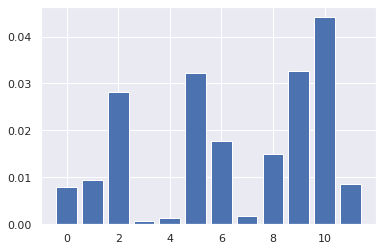

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267


In [ ]:
model.save("cooler.h5")

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",                # Criterion
                                  max_depth = 8,  
                                  min_samples_split = 2, # Max Height of Tree
                                  min_samples_leaf = 1,              # Maximum Leaf samples
                                  random_state = 100)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)  

print ("Accuracy : ", accuracy_score(y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(y_test, y_pred_gini))
text_representation = tree.export_text(clf_gini, feature_names=X.columns.tolist())
print(text_representation)
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for feature_names,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (feature_names,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, tick_label= X.columns)
pyplot.show()

Accuracy :  100.0
Report :                precision    recall  f1-score   support

           3       1.00      1.00      1.00       147
          20       1.00      1.00      1.00       146
         100       1.00      1.00      1.00       148

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

|--- CE1 <= 32.00
|   |--- CP1 <= 1.67
|   |   |--- class: 3
|   |--- CP1 >  1.67
|   |   |--- class: 20
|--- CE1 >  32.00
|   |--- CP1 <= 1.99
|   |   |--- class: 3
|   |--- CP1 >  1.99
|   |   |--- class: 100

